In [ ]:
#The study had a fairly equal distribution of male (51%) and female (49%) mice
#Not all mice had the same timepoint data ranging from 0-45
#The tumor volume for mouse ID s185 decreased by 48% on the drug regimen

In [1]:
#import dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#read data files and convert to dataframe
mouse_data = "Resources/metadata.csv"
results_data = "Resources/results.csv"

mouse_df = pd.read_csv(mouse_data)
results_df = pd.read_csv(results_data)

In [3]:
#merge original dataframes ** merge at the beginning **
merged_df = pd.merge(results_df, mouse_df, on="Mouse ID", how = "left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
#get mouse ID value counts
merged_df['Mouse ID'].nunique()

249

In [5]:
#identify duplicated values for ID and Timpoint using https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
dropped_df = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dropped_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [6]:
# Create a new DataFrame that removes the mouse ID g989
merged_df = merged_df.loc[results_df["Mouse ID"] != "g989"]
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
#find mouse count after removal
len(merged_df['Mouse ID'].value_counts())

248

In [8]:
#groupby Drug Regimen
regimen_count = merged_df['Drug Regimen'].value_counts()
regimen_df = merged_df.groupby(['Drug Regimen'])

In [9]:
#calculate summary dataframe values
mean_tumor = regimen_df['Tumor Volume (mm3)'].mean()
median_tumor = regimen_df['Tumor Volume (mm3)'].median()
variance_tumor = regimen_df['Tumor Volume (mm3)'].var()
std_dev_tumor = regimen_df['Tumor Volume (mm3)'].std()
sem_tumor = regimen_df['Tumor Volume (mm3)'].sem()

In [10]:
#create Summary Dataframe and format accordingly
summary_table_df = pd.DataFrame({
    "Count" : regimen_count,
    "Tumor Volume Mean" : mean_tumor,
    "Tumor Volume Median" : median_tumor,
    "Tumor Volume Variance" : variance_tumor,
    "Tumor Volume Std Dev" : std_dev_tumor,
    "Tumor Volume SEM" : sem_tumor
})
summary_table_df['Tumor Volume Mean'] = summary_table_df['Tumor Volume Mean'].map("{:.2f}".format)
summary_table_df['Tumor Volume Median'] = summary_table_df['Tumor Volume Median'].map("{:.2f}".format)
summary_table_df['Tumor Volume Variance'] = summary_table_df['Tumor Volume Variance'].map("{:.2f}".format)
summary_table_df['Tumor Volume Std Dev'] = summary_table_df['Tumor Volume Std Dev'].map("{:.2f}".format)
summary_table_df['Tumor Volume SEM'] = summary_table_df['Tumor Volume SEM'].map("{:.2f}".format)
summary_table_df

,Count,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60
Placebo,181,54.03,52.29,61.17,7.82,0.58
Propriva,148,52.32,50.45,43.85,6.62,0.54
Ramicane,228,40.22,40.67,23.49,4.85,0.32
Stelasyn,181,54.23,52.43,59.45,7.71,0.57
Zoniferol,182,53.24,51.82,48.53,6.97,0.52


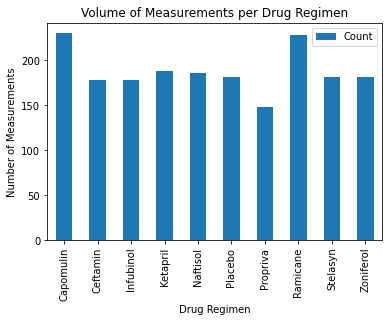

In [11]:
#plot bar chart using Pandas
summary_table_df.plot(kind = "bar", y = 'Count')
plt.title("Volume of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

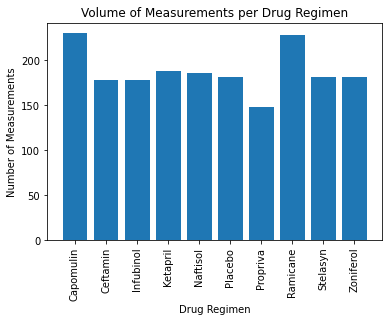

In [12]:
#plot bar chart using plt
plt.bar(summary_table_df.index, summary_table_df['Count'])
plt.xticks(summary_table_df.index, rotation = "vertical")
plt.title("Volume of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

In [13]:
#groupby Gender
gender_count = merged_df['Sex'].value_counts()
gender_df = merged_df.groupby(['Sex'])

In [14]:
#create gender dataframe
summary_gender_df = pd.DataFrame({
    "Count" : gender_count,
})
summary_gender_df

,Count
Male,958
Female,922


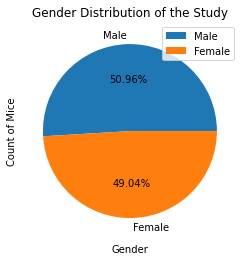

In [15]:
#plot pie chart using Pandas
summary_gender_df.plot(kind = "pie", y = 'Count', autopct="%1.2f%%")
plt.title("Gender Distribution of the Study")
plt.xlabel("Gender")
plt.ylabel("Count of Mice")
plt.show()

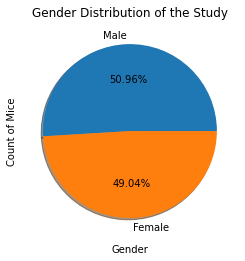

In [16]:
#plot pie chart using plt
plt.pie(summary_gender_df['Count'], labels = summary_gender_df.index, shadow = True, autopct="%1.2f%%")
plt.title("Gender Distribution of the Study")
plt.xlabel("Gender")
plt.ylabel("Count of Mice")
plt.show()

In [17]:
# Create a new DataFrame that removes the regimens out of scope (Capomulin, Ramicane, Infubinol, and Ceftamin)

top_four_df = merged_df.loc[merged_df["Drug Regimen"] != "Ketapril"]
top_four_df = top_four_df.loc[top_four_df["Drug Regimen"] != "Naftisol"]
top_four_df = top_four_df.loc[top_four_df["Drug Regimen"] != "Placebo"]
top_four_df = top_four_df.loc[top_four_df["Drug Regimen"] != "Propriva"]
top_four_df = top_four_df.loc[top_four_df["Drug Regimen"] != "Stelasyn"]
top_four_df = top_four_df.loc[top_four_df["Drug Regimen"] != "Zoniferol"]

top_four_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [18]:
#remove duplicate mouse ID values and keep last timepoint value using https://stackoverflow.com/questions/49425727/how-do-i-drop-duplicates-and-keep-the-last-timestamp-on-pandas
finaltime_df = top_four_df.sort_values('Timepoint').drop_duplicates(['Mouse ID'], keep='last')
finaltime_df["Timepoint"].value_counts()

45    63
30     9
5      6
35     4
15     4
0      4
25     3
20     3
40     2
10     2
Name: Timepoint, dtype: int64

In [19]:
#find mouse count in new dataframe
mouse_count = len(finaltime_df['Mouse ID'].value_counts())
mouse_count

100

In [20]:
#create series for each drug regimen values
capomulin = finaltime_df.loc[finaltime_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = finaltime_df.loc[finaltime_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = finaltime_df.loc[finaltime_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = finaltime_df.loc[finaltime_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']


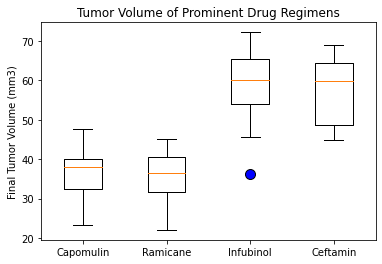

In [21]:
#plot the box and whisker charts 
outliers = dict(markerfacecolor='blue',markersize=10)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Tumor Volume of Prominent Drug Regimens")
plt.show()


In [22]:
#perform quartile calculations and print results
regimen_list = [capomulin, ramicane, infubinol, ceftamin]

for regimen in regimen_list:
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [23]:
#Worked with David Chou (my Tutor) on this block of code. The block above was my initial stab using past activities

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = finaltime_df.loc[finaltime_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
    print()


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 420    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



In [24]:
#create a dataframe for one mouse that was on Capomulin
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
one_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == "s185"]

In [25]:
#define data for volume and time for mouse s185
mouse_tumor_volume = one_mouse_df["Tumor Volume (mm3)"]
mouse_timestamp = one_mouse_df["Timepoint"]
print(f'the max tumor volume: {one_mouse_df["Tumor Volume (mm3)"].max()}')
print(f'The min tumor volume: {one_mouse_df["Tumor Volume (mm3)"].min()}')
tumor_decrease = (one_mouse_df["Tumor Volume (mm3)"].max() - one_mouse_df["Tumor Volume (mm3)"].min()) / one_mouse_df["Tumor Volume (mm3)"].max()*100
print(f'The tumor volume decreased by {tumor_decrease}%')

the max tumor volume: 45.0
The min tumor volume: 23.34359787
The tumor volume decreased by 48.125338066666664%


In [26]:
tumor_decrease = (one_mouse_df["Tumor Volume (mm3)"].max() - one_mouse_df["Tumor Volume (mm3)"].min()) / one_mouse_df["Tumor Volume (mm3)"].max()*100
tumor_decrease

48.125338066666664

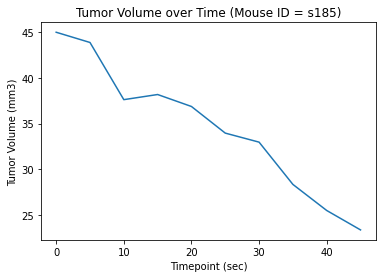

In [27]:
#plot the volume over time line chart
plt.plot(mouse_timestamp, mouse_tumor_volume)
plt.title("Tumor Volume over Time (Mouse ID = s185)")
plt.xlabel("Timepoint (sec)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

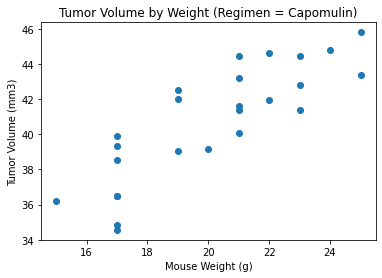

In [28]:
#create capomulin scatter plot by average weight for Mouse ID
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average_df['Weight (g)'], capomulin_average_df['Tumor Volume (mm3)'])
plt.title("Tumor Volume by Weight (Regimen = Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

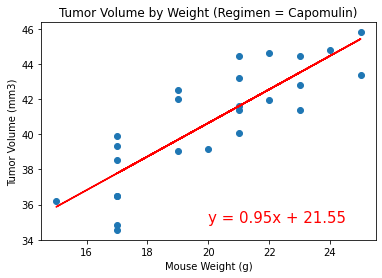

In [29]:
#perform regression analysis and overlay line
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_average_df['Weight (g)'], capomulin_average_df['Tumor Volume (mm3)'])
regress_values = capomulin_average_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Tumor Volume by Weight (Regimen = Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [30]:
#print r squared and correlation coefficient
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation coefficient between Weight and Tumor Volume is {capomulin_average_df['Weight (g)'].corr(capomulin_average_df['Tumor Volume (mm3)']).round(3)}")


The r-squared is: 0.7088568047708717
 The correlation coefficient between Weight and Tumor Volume is 0.842
